In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.stats.circstats import circmean
from functools import reduce
import datetime
import pickle
import time
import plotly.express as px
import numpy as np
import sqlite3

pd.set_option("display.precision", 2)
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [5]:
connector = sqlite3.connect("../../Extras/graphs_data.db")
cursor = connector.cursor()

### Heart Rate graphs printer

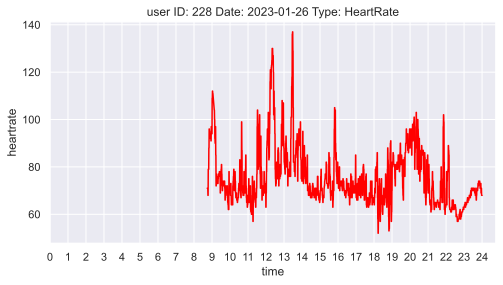

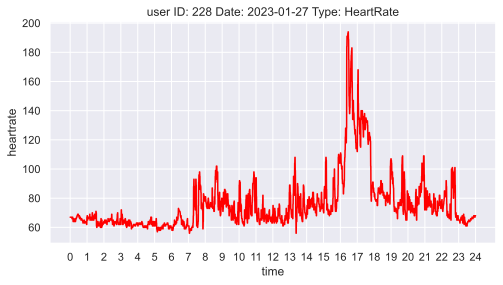

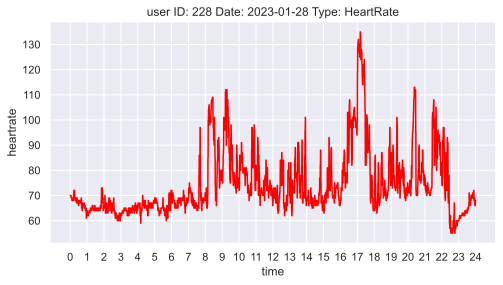

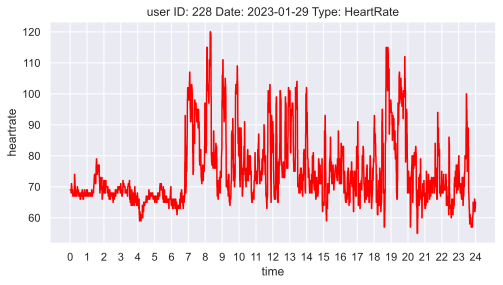

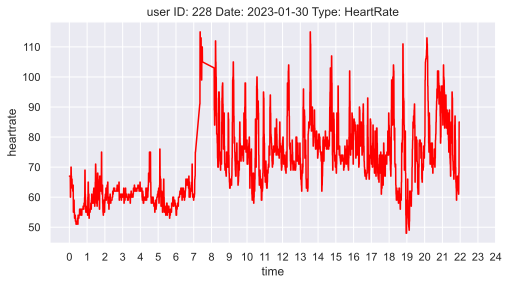

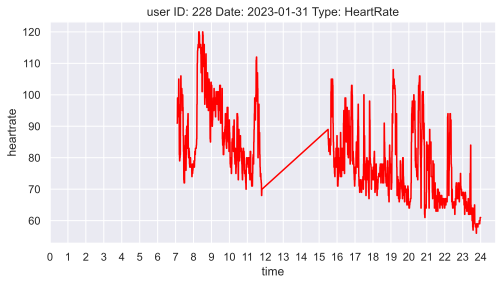

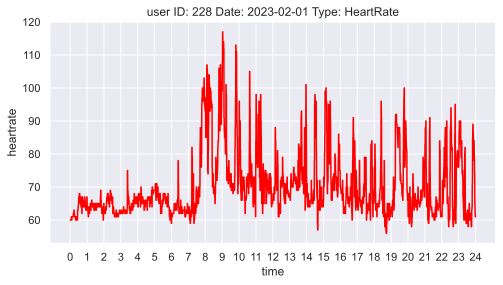

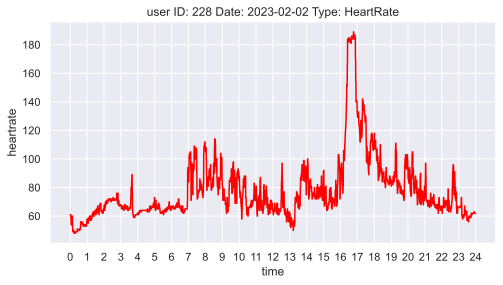

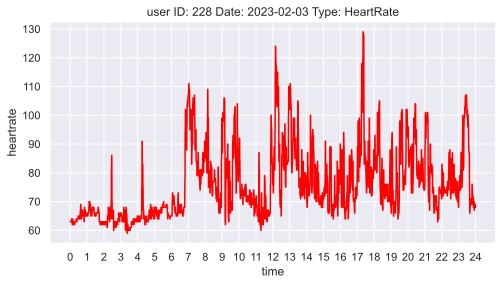

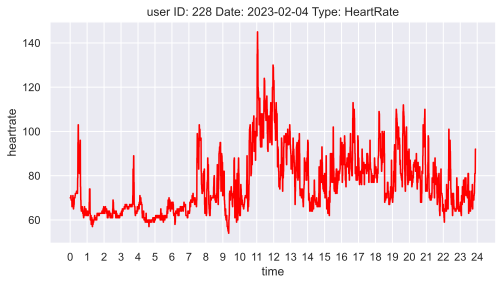

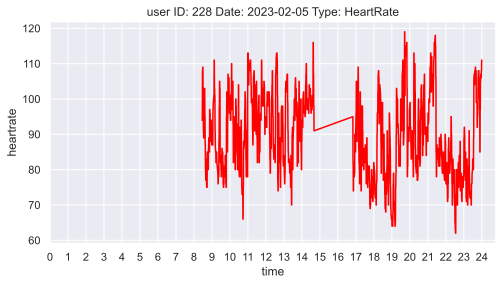

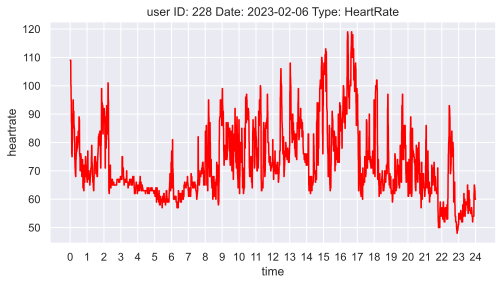

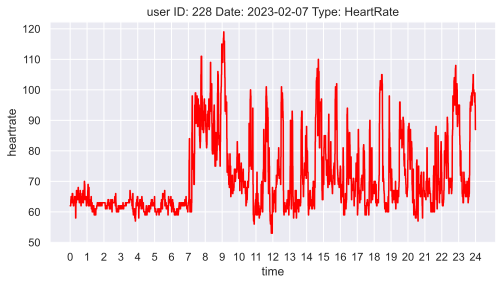

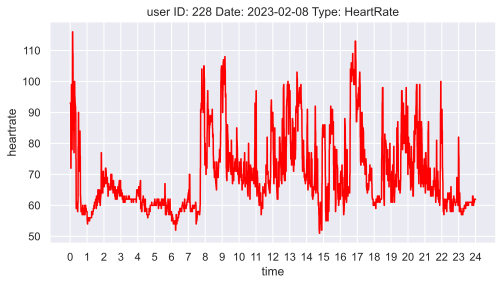

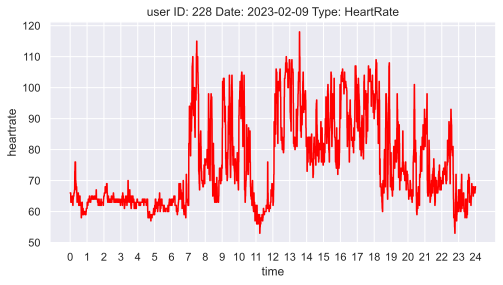

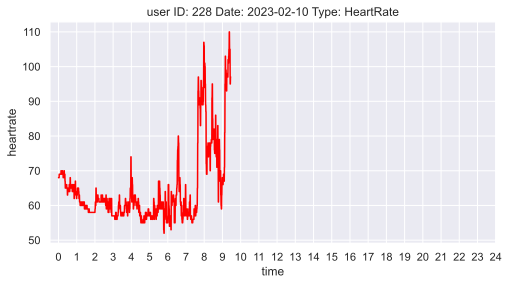

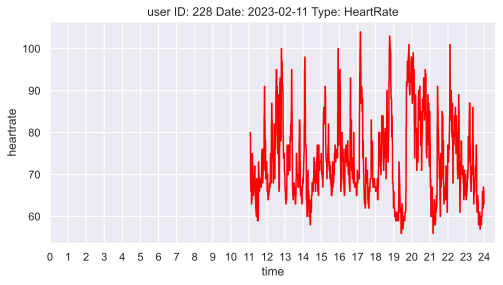

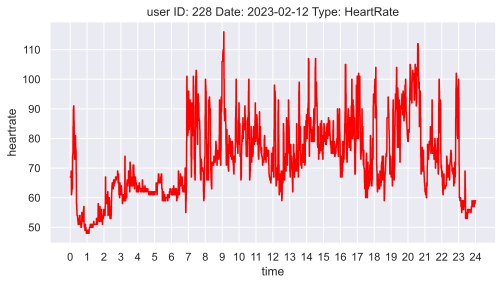

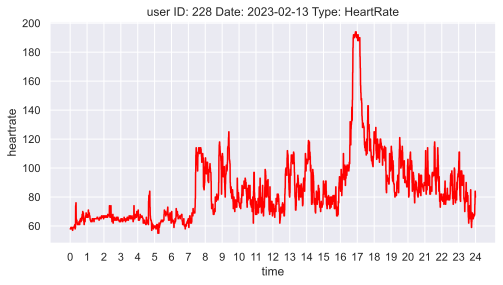

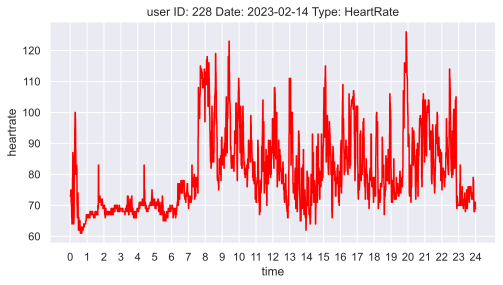

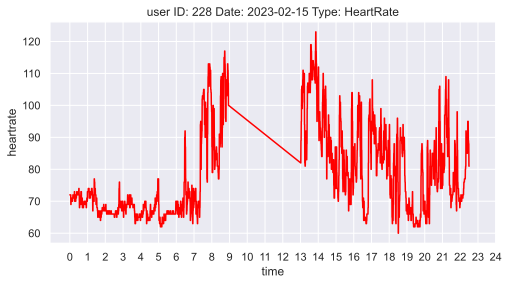

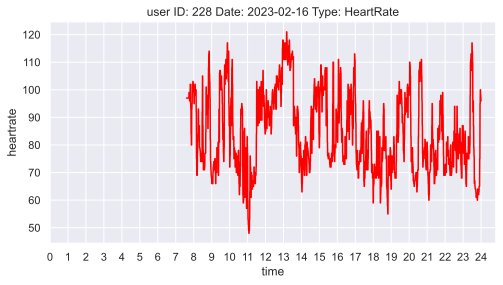

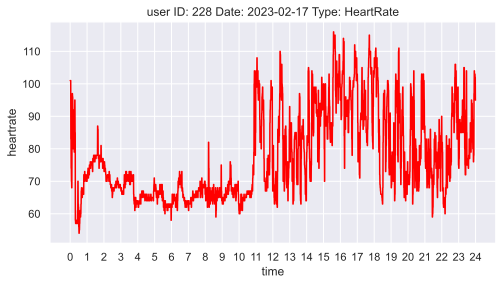

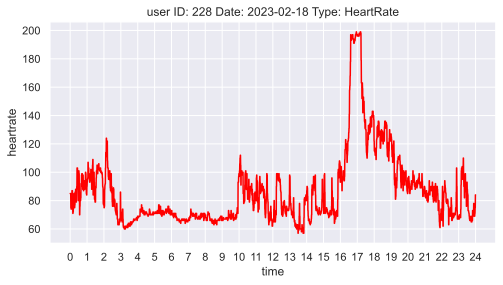

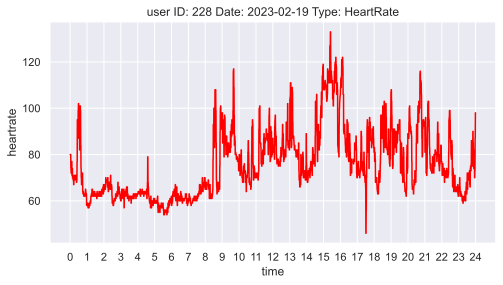

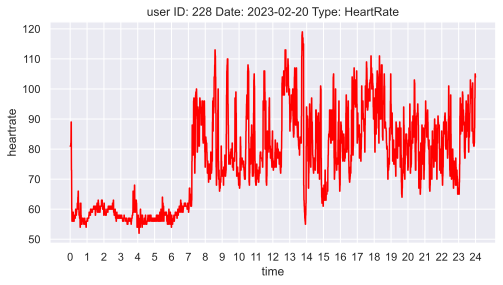

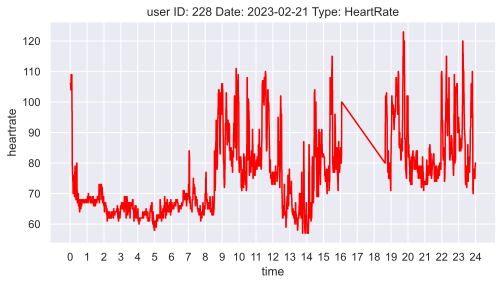

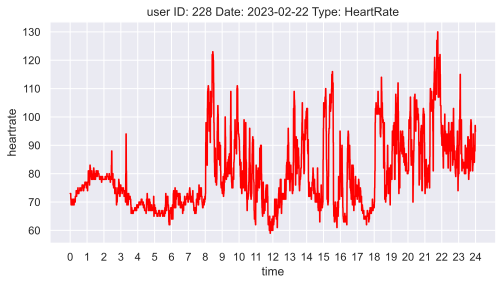

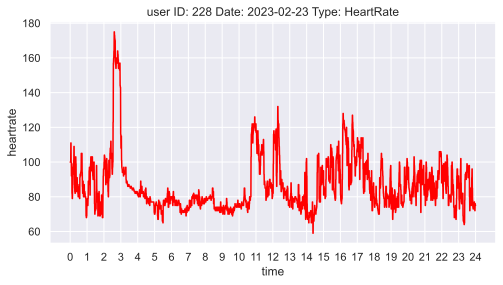

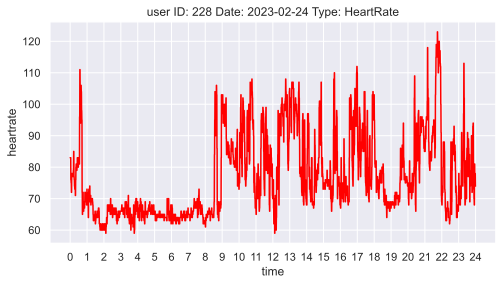

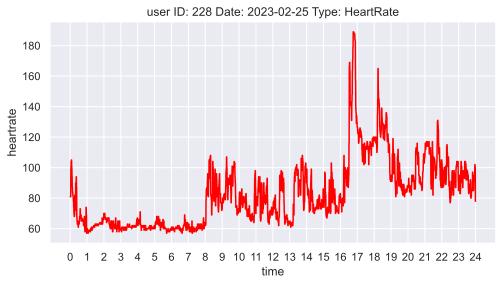

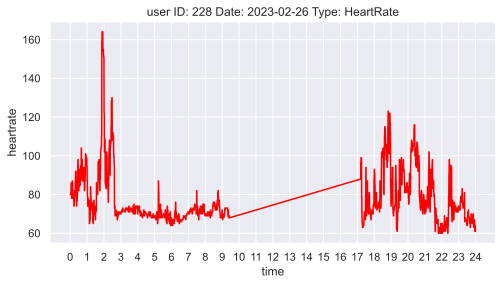

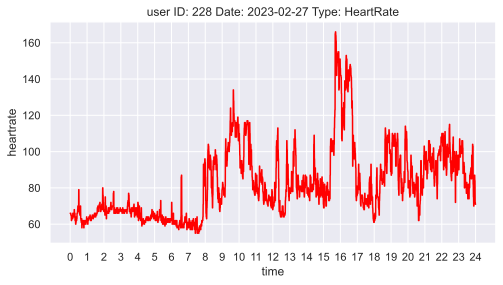

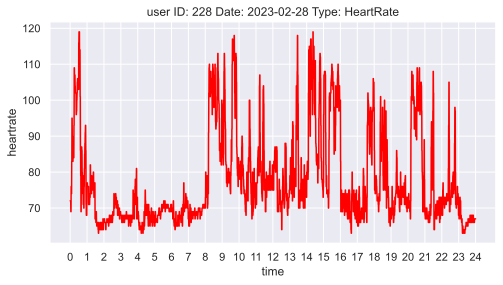

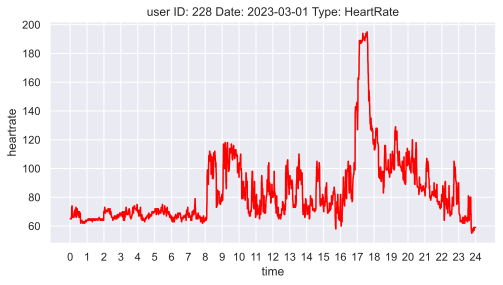

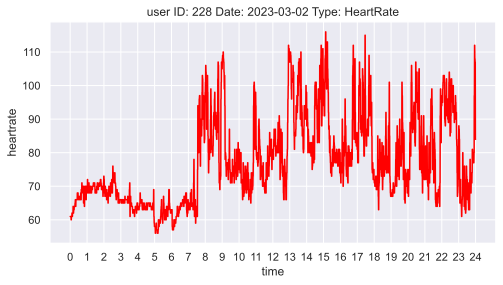

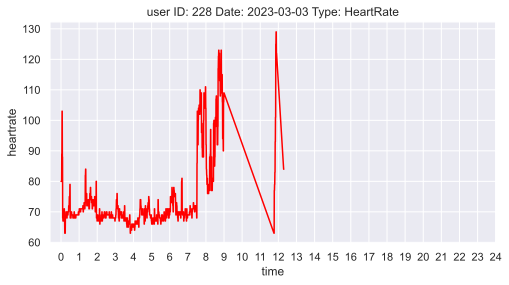

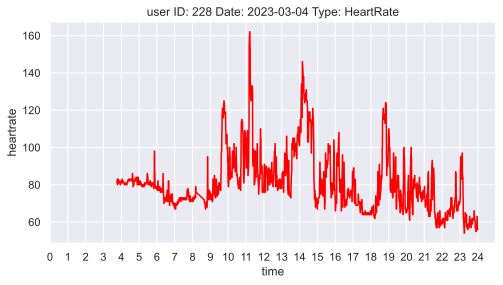

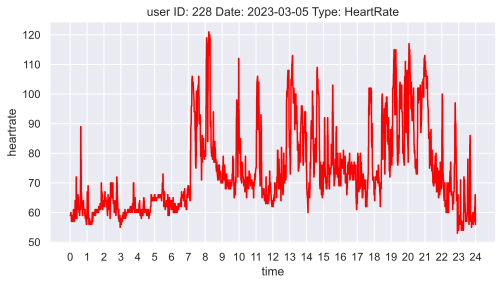

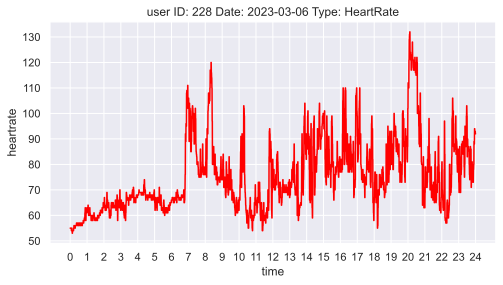

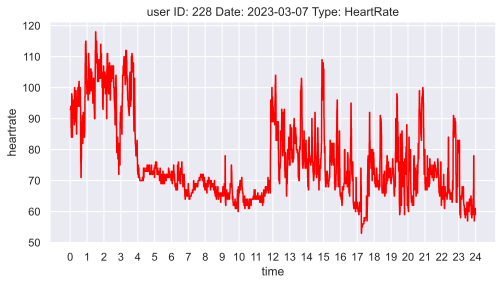

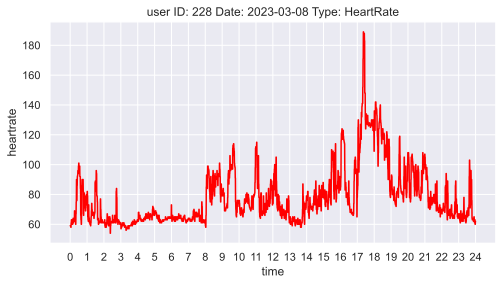

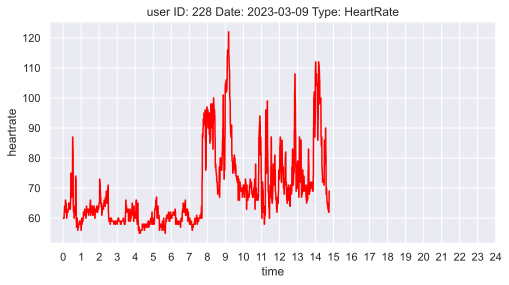

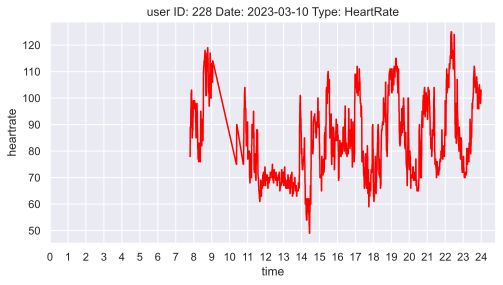

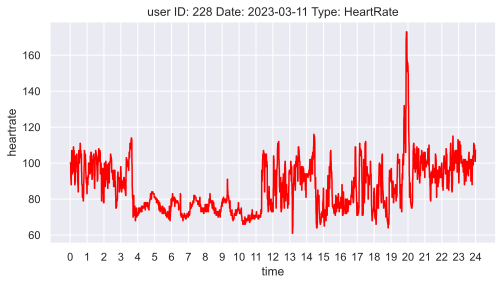

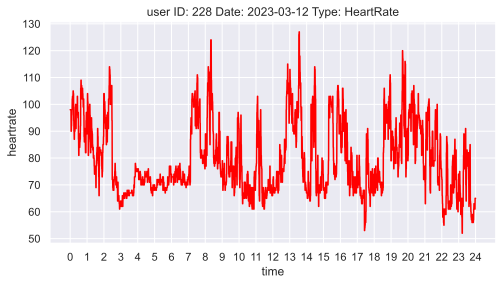

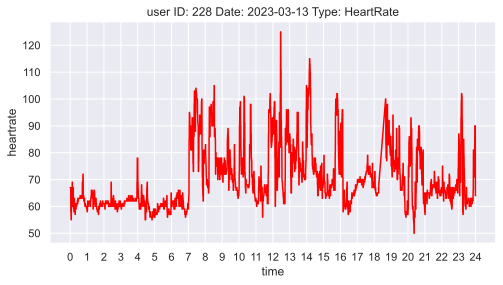

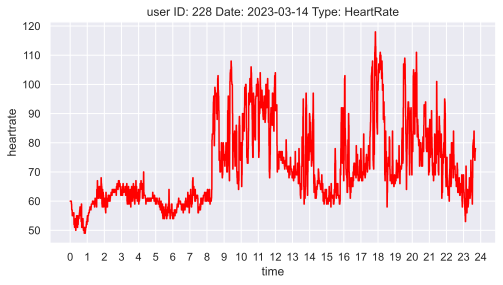

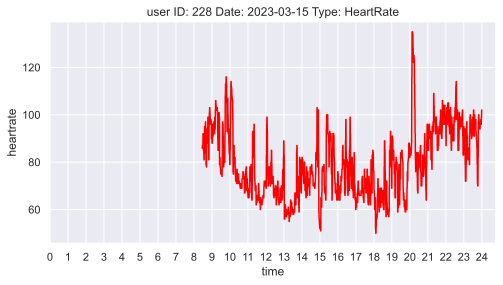

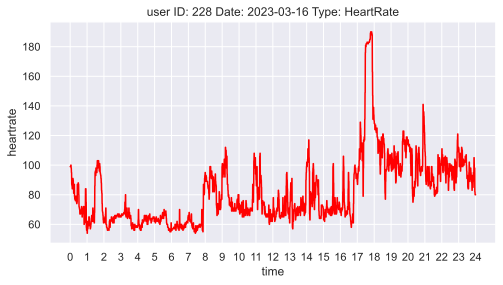

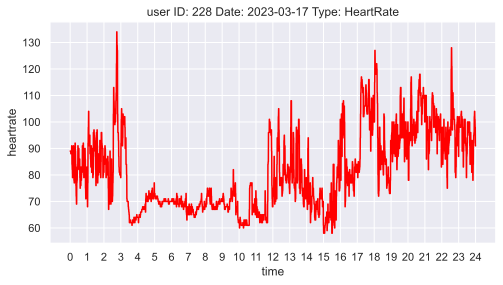

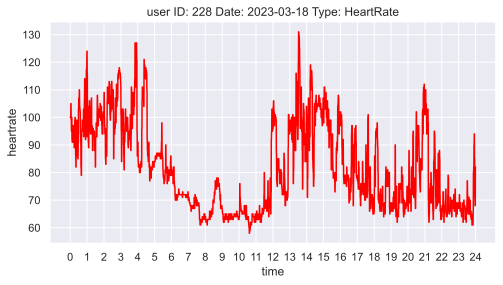

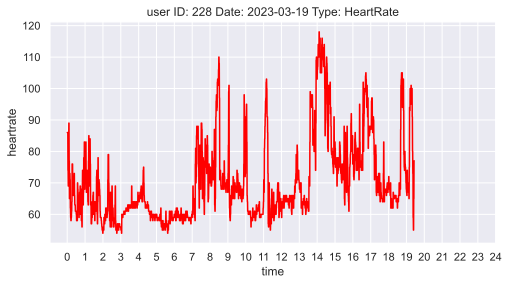

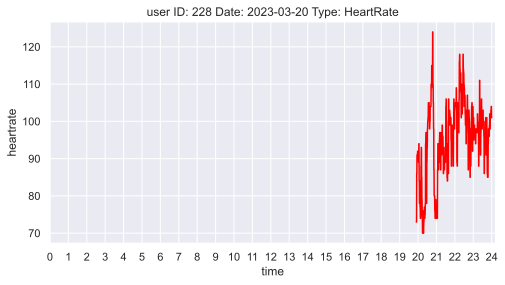

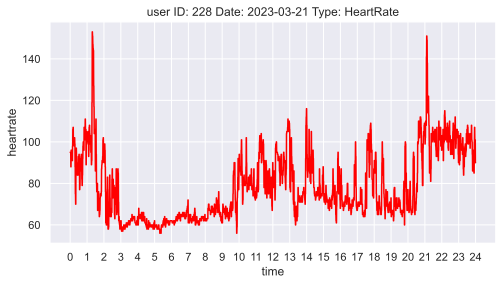

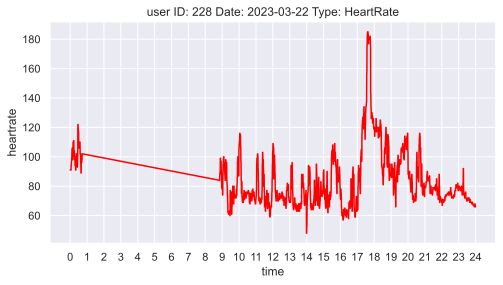

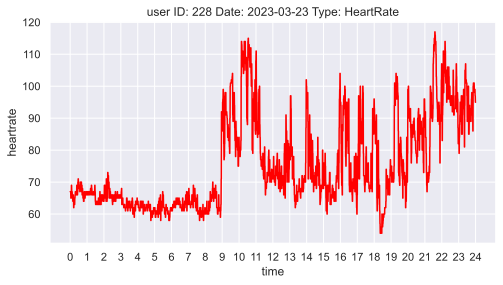

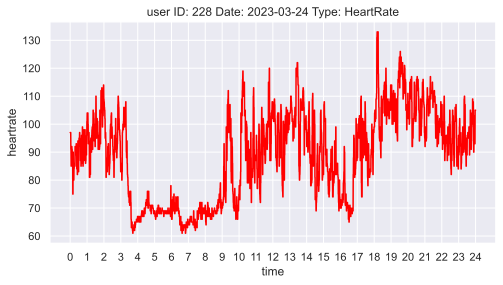

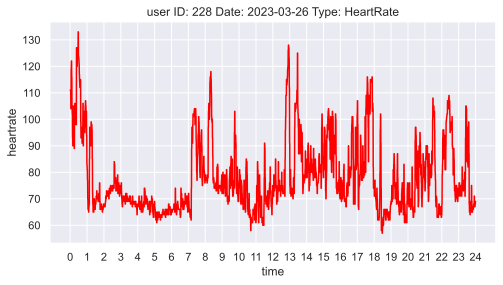

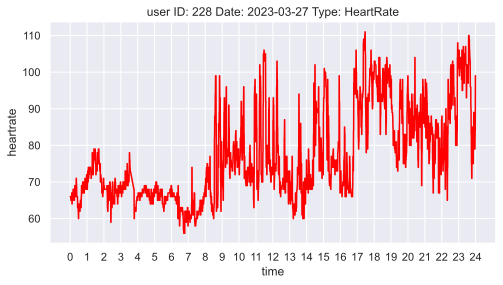

In [6]:
cursor.execute("SELECT * FROM heartrate_graphs_data WHERE id=228")
rows = cursor.fetchall()
for row in rows:
        #getting heartrate samples from dataframe
        heartrate_samples_dict = pickle.loads(row[3])
        heartrate_dict_keys = list(heartrate_samples_dict.keys())
        heartrate_dict_values = list(heartrate_samples_dict.values())
        heartrate_samples_df = pd.DataFrame({'time':heartrate_dict_keys, 'heartrate':heartrate_dict_values})
        #preparing plot title name
        plot_title_name = 'user ID: '+str(row[0])+' Date: '+str(row[1])+' Type: '+str(row[2])
        #creating lineplot
        sns.lineplot(x='time', y='heartrate', data=heartrate_samples_df, color='red')
        plt.title(plot_title_name)
        # configurating axis "x" bins
        plt.xticks(np.arange(0, 25, step=1))
        
        plt.show()